# Neural Nets with Tensorflow on iris

## 1. Load libraries

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [21]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

## 2. Load and transform the iris dataset

In [22]:
iris = datasets.load_iris()
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target'])

species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')

iris['species'] = species
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


## 3. Preparing the dataset and spliting into Train and Test sets

In [25]:
X = iris.loc[:, iris.columns != 'species']
y = iris.loc[:, ['species']]

y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (105, 5), Y Train : (105, 3)
(5,)


## 4. Define the model

In [28]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    return model

In [30]:
model = get_model()

# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              6000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 903       
                                                                 
Total params: 657,703
Trainable params: 657,703
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
4/4 [==============================] - 1s 88ms/step - loss: 1.0269 - accuracy: 0.3714 - val_loss: 0.6995 - val_accuracy: 1.0000
Epoch 2/30
4/4 [==============================] - 0s 20ms/step - loss: 0.7339 - accuracy: 0.8381 - val_loss: 0.4722 - val_accuracy: 0.9333
Epoch 3/30
4/4 [==============================] - 0s 22ms/step - loss: 0.4882 - accuracy: 0.8857 - val_loss: 0.2942 - val_accuracy: 1.0000
Epoch 4/30
4/4 [==============================] - 0s 37ms/step - loss: 0.3314 - accuracy: 0.9048 - val_loss: 0.3209 - val_accuracy: 0.7556
Epoch 5/30
4/4 [==============================] - 0s 38ms/step - loss: 0.3772 - accuracy: 0.7714 - val_loss: 0.1821 - val_accuracy: 0.9778
Epoch 6/30
4/4 [==============================] - 0s 38ms/step - loss: 0.1795 - accuracy: 0.9714 - val_loss: 0.0841 - val_accuracy: 1.0000
Epoch 7/30
4/4 [==============================] - 0s 34ms/step - loss: 0.0979 - accuracy: 0.9905 - val_loss: 0.0660 - val_accuracy: 1.0000
Epoch 8/30
4/4 [===========

In [33]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 3.7179e-04 - accuracy: 1.0000


[0.00037178973434492946, 1.0]

## 5. Monitor the performance

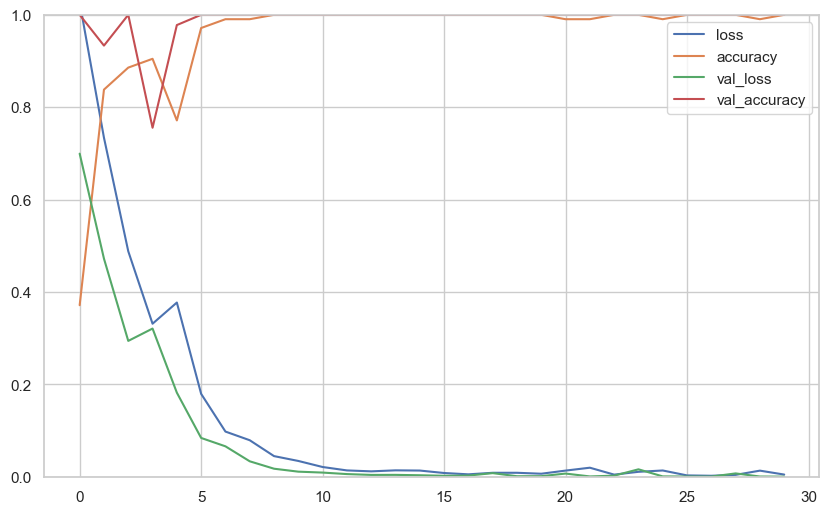

In [34]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
new_data, y_actual = X_test[:3], y_test[:3]

y_proba = model.predict(new_data)

print(f"Actual data : {y_actual}")

for pred in y_proba:
    print(np.argmax(pred))

1/1 [==============================] - 1s 751ms/step
Actual data : [[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
1
1
0
